In [41]:
%matplotlib inline
import pymongo
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
class MongoDBServices:
    '''A utility class to perform video reporting queries into the MongoDB store'''
    
    def __init__(self, config):
        '''Initializes an instance of the class'''
        
        # Initialize DB collections to fetch from
        self.youtube_collection = config['youtube_collection']
        self.twitter_collection = config['twitter_collection']
        self.facebook_collection = config['facebook_collection']
        
        # Initialize DB 
        if 'database' in config:
            database = config['database']
        else:
            database = 'VideosDB'
        if 'host' in config:
            host = config['host']
        else:
            host = 'localhost'
        if 'port' in config:
            port = int(config['port'])
        else:
            port = 27017
        
        client = pymongo.MongoClient(host, int(port))
        self.db = client[database]
        
    def get_top_youtube_videos(self, n):
        'Returns the top n Youtube videos from the document store based on an internal popularity rating'
        
        return self.db[self.youtube_collection].find({},
            projection=['items.statistics.viewCount', 'items.snippet.channelTitle', 'items.snippet.title', 'items.id' ],
            sort=[('items.statistics.viewCount',-1)],
            limit=n)

    def get_top_twitter_videos(self, n):
        '''Returns the top n Twitter videos from the document store based on an internal popularity rating'''

        return self.db[self.twitter_collection].find({},
            projection=['tweet.orig_favorite_count', 'tweet.orig_user_name', 'tweet.orig_text', 'tweet.orig_id_str'],
            sort=[('tweet.orig_favorite_count',-1)],
            limit=n)
    
    def get_top_facebook_videos(self, n):
        '''Returns the top n Facebook videos from the document store based on an internal popularity rating'''
        
        return self.db[self.facebook_collection].find({},
            projection=['total_likes', 'page.page_name', 'description', 'id' ],
            sort=[('total_likes',-1)],
            limit=n)

In [11]:
# Initialize a DB connection
test_defaults = {
    'youtube_collection':'Youtube',
    'twitter_collection':'twitter',
    'facebook_collection':'facebook',
    'host':'67.228.179.2',
    'port':'27017',
    'database': 'VideosDB',
}

db_services = MongoDBServices(test_defaults)

In [22]:
#
# Twitter popularity counts
#
cursor = db_services.get_top_twitter_videos(0)
print ('Cursor count: %d')%(cursor.count())
twitter_video_counts = [video['tweet']['orig_favorite_count'] for video in cursor]

Cursor count: 504100


Length of Twitter Video Count: 504111
('Quartiles: ', array([   0.,    0.,   17.,  158.]))


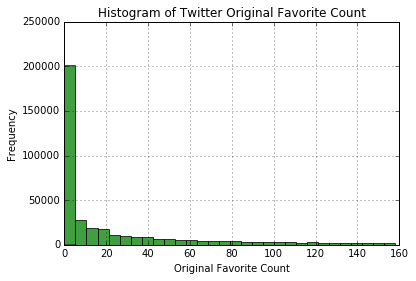

In [24]:
# the histogram of the data
print ('Length of Twitter Video Count: %d'%(len(twitter_video_counts)))
print('Quartiles: ', np.percentile(twitter_video_counts, np.arange(0, 100, 25))) # quartiles

n, bins, patches = plt.hist(twitter_video_counts, bins=30, range=(0,158), facecolor='green', alpha=0.75)

plt.xlabel('Original Favorite Count')
plt.ylabel('Frequency')
plt.title('Histogram of Twitter Original Favorite Count')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

In [25]:
#
# Facebook popularity counts
#
cursor = db_services.get_top_facebook_videos(0)
print ('Cursor count: %d')%(cursor.count())
facebook_video_counts = [video['total_likes'] for video in cursor]

Cursor count: 860000


Length of Facebook Video Count: 860214
('Quartiles: ', array([   0.,   21.,  101.,  496.]))


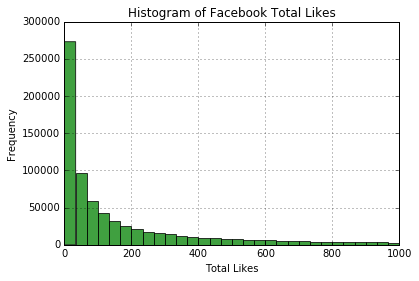

In [30]:
# the histogram of the data
print ('Length of Facebook Video Count: %d'%(len(facebook_video_counts)))
print('Quartiles: ', np.percentile(facebook_video_counts, np.arange(0, 100, 25))) # quartiles

n, bins, patches = plt.hist(facebook_video_counts, bins=30, range=(0,1000), facecolor='green', alpha=0.75)

plt.xlabel('Total Likes')
plt.ylabel('Frequency')
plt.title('Histogram of Facebook Total Likes')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

In [42]:
#
# Youtube popularity counts
#
cursor = db_services.get_top_youtube_videos(0)
print ('Cursor count: %d')%(cursor.count())
youtube_video_counts = []
for video in cursor:
    if 'items' in video and len(video['items'])>0  and not math.isnan(video['items'][0]['statistics']['viewCount']):
        youtube_video_counts.append(int(video['items'][0]['statistics']['viewCount']))

Cursor count: 9751


Length of Youtube Video Count: 9749
('Quartiles: ', array([     0.,    407.,   6801.,  50790.]))


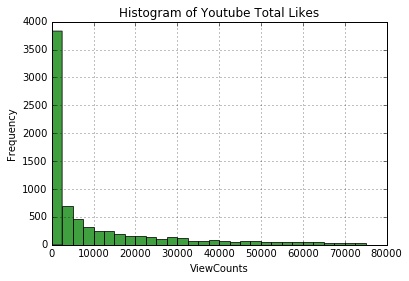

In [44]:
# the histogram of the data
print ('Length of Youtube Video Count: %d'%(len(youtube_video_counts)))
print('Quartiles: ', np.percentile(youtube_video_counts, np.arange(0, 100, 25))) # quartiles

n, bins, patches = plt.hist(youtube_video_counts, bins=30, range=(0,75000), facecolor='green', alpha=0.75)

plt.xlabel('ViewCounts')
plt.ylabel('Frequency')
plt.title('Histogram of Youtube Total Likes')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()